# IMDB Data Storytelling Project

IMDb is an incredible dataset. Started by a Usenet group and maintained to this day mostly by volunteer submissions, it contains information about a staggering number of motion pictures, including feature films, TV shows, even video games. And better yet, they offer much of their data in the form of .tsv files! Looking at what data they offered up, I became interested in IMDb user rating behavior.

This particular notebook adds "hyped" feature and explores Plotly Express.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
import plotly.express as px

# Loading Budget/Box Office Data

In [36]:
df_movies_top = pd.read_csv('data/df_movies_top.csv')
box_office = pd.read_csv('data/Box Office Data - Sheet1 (1).csv', 
                         names=['Index','Release_Date','Movie','Production_Budget',
                                'Domestic_Gross','Worldwide_Gross'],
                         index_col='Index')

In [37]:
box_office.shape

(5876, 5)

In [38]:
box_office = box_office.drop(np.nan)

In [39]:
box_office.shape

(5875, 5)

In [40]:
# Remove movies
box_office['Release_dt'] = pd.to_datetime(box_office['Release_Date'], errors='coerce', format='%b %d, %Y')
box_office['Release_dt_isna'] = box_office['Release_dt'].isna()
box_office = box_office[box_office['Release_dt_isna'] == 0]

In [41]:
box_office.sample(10)

Release_Date                                            Movie  \
Index                                                                  
763    May 28, 2010                                            Agora   
2,653  Jan 17, 2003                                      A Guy Thing   
2,634  May 11, 2007                                     Georgia Rule   
5,007  Sep 12, 2003  The Book of Mormon Movie, Volume 1: The Journey   
2,149  Nov 23, 2016                                Rules Don’t Apply   
1,183   Feb 9, 2007                                  Hannibal Rising   
2,999   Dec 9, 1988                        My Stepmother Is an Alien   
567    Dec 25, 2008                                  Bedtime Stories   
3,044  Jun 28, 1978                                  Heaven Can Wait   
1,066  Jun 19, 1981                                      Superman II   

      Production_Budget Domestic_Gross Worldwide_Gross Release_dt  \
Index                                                               
763         $70,000,000       $619,423     $38,992,292 2010-05-28   
2,653       $20,000,000    $15,543,862     $17,430,594 2003-01-17   
2,634       $20,000,000    $18,882,880     $20,819,601 2007-05-11   
5,007        $2,000,000     $1,660,865      $1,660,865 2003-09-12   
2,149       $26,700,000     $3,652,206      $3,871,448 2016-11-23   
1,183       $50,000,000    $27,669,725     $80,583,311 2007-02-09   
2,999       $16,000,000    $13,854,000     $13,854,000 1988-12-09   
567         $80,000,000   $110,101,975    $221,468,935 2008-12-25   
3,044       $15,000,000    $98,800,000     $98,800,000 1978-06-28   
1,066       $54,000,000   $108,185,706    $108,185,706 1981-06-19   

       Release_dt_isna  
Index                   
763              False  
2,653            False  
2,634            False  
5,007            False  
2,149            False  
1,183            False  
2,999            False  
567              False  
3,044            False  
1,066            False

In [42]:
box_office['Release_Year'] = box_office['Release_dt'].dt.year

box_office['Release_Year_str'] = box_office['Release_Year'].apply(str)

box_office['Movie_merger'] = box_office['Movie'].str.lower() + ' ' + box_office['Release_Year_str']

In [43]:
box_office.head()

Release_Date                                        Movie  \
Index                                                              
1      May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      Apr 23, 2019                            Avengers: Endgame   
3      Apr 22, 2015                      Avengers: Age of Ultron   
4      Dec 13, 2017            Star Wars Ep. VIII: The Last Jedi   
5      Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   

      Production_Budget Domestic_Gross Worldwide_Gross Release_dt  \
Index                                                               
1          $410,600,000   $241,063,875  $1,045,663,875 2011-05-20   
2          $400,000,000   $858,373,000  $2,795,473,000 2019-04-23   
3          $330,600,000   $459,005,868  $1,403,013,963 2015-04-22   
4          $317,000,000   $620,181,382  $1,316,721,747 2017-12-13   
5          $306,000,000   $936,662,225  $2,053,311,220 2015-12-16   

       Release_dt_isna  Release_Year Release_Year_str  \
Index                                                   
1                False          2011             2011   
2                False          2019             2019   
3                False          2015             2015   
4                False          2017             2017   
5                False          2015             2015   

                                           Movie_merger  
Index                                                    
1      pirates of the caribbean: on stranger tides 2011  
2                                avengers: endgame 2019  
3                          avengers: age of ultron 2015  
4                star wars ep. viii: the last jedi 2017  
5             star wars ep. vii: the force awakens 2015

In [44]:
box_office.shape

(5708, 10)

In [45]:
df_movies_top['startYear_str'] = df_movies_top['startYear'].apply(str)

In [46]:
df_movies_top['Movie_merger'] = df_movies_top['primaryTitle'].str.lower() + ' ' + df_movies_top['startYear_str']

In [47]:
df_movies_top.head()

Unnamed: 0     tconst titleType  \
0           0  tt0000147     movie   
1           1  tt0000574     movie   
2           2  tt0002101     movie   
3           3  tt0002130     movie   
4           4  tt0002199     movie   

                                        primaryTitle  \
0                      The Corbett-Fitzsimmons Fight   
1                        The Story of the Kelly Gang   
2                                          Cleopatra   
3                                    Dante's Inferno   
4  From the Manger to the Cross; or, Jesus of Naz...   

                                       originalTitle  startYear  \
0                      The Corbett-Fitzsimmons Fight       1897   
1                        The Story of the Kelly Gang       1906   
2                                          Cleopatra       1912   
3                                          L'Inferno       1911   
4  From the Manger to the Cross; or, Jesus of Naz...       1912   

   runtimeMinutes                   genres  averageRating  numVotes  ...  \
0            20.0   Documentary,News,Sport            5.1       309  ...   
1            70.0    Biography,Crime,Drama            6.1       537  ...   
2           100.0            Drama,History            5.2       419  ...   
3            68.0  Adventure,Drama,Fantasy            7.0      2014  ...   
4            60.0          Biography,Drama            5.7       437  ...   

   News  Reality-TV  Romance  Sci-Fi  Sport  Thriller  War  Western  \
0     1           0        0       0      1         0    0        0   
1     0           0        0       0      0         0    0        0   
2     0           0        0       0      0         0    0        0   
3     0           0        0       0      0         0    0        0   
4     0           0        0       0      0         0    0        0   

   startYear_str                                       Movie_merger  
0           1897                 the corbett-fitzsimmons fight 1897  
1           1906                   the story of the kelly gang 1906  
2           1912                                     cleopatra 1912  
3           1911                               dante's inferno 1911  
4           1912  from the manger to the cross; or, jesus of naz...  

[5 rows x 40 columns]

In [48]:
df_movies_top.shape

(59386, 40)

In [49]:
# Looks like this technique will work for most of my titles.
# Gotta remember, worst case scenario, I just have to manually match the titles
# in the original .csv for box_office

df_movies_top[df_movies_top['primaryTitle'].str.contains('on stranger tides', case=False)]

Unnamed: 0     tconst titleType  \
38544       38544  tt1298650     movie   

                                      primaryTitle  \
38544  Pirates of the Caribbean: On Stranger Tides   

                                     originalTitle  startYear  runtimeMinutes  \
38544  Pirates of the Caribbean: On Stranger Tides       2011           136.0   

                         genres  averageRating  numVotes  ...  News  \
38544  Action,Adventure,Fantasy            6.6    455834  ...     0   

       Reality-TV  Romance  Sci-Fi  Sport  Thriller  War  Western  \
38544           0        0       0      0         0    0        0   

       startYear_str                                      Movie_merger  
38544           2011  pirates of the caribbean: on stranger tides 2011  

[1 rows x 40 columns]

In [50]:
merged = pd.merge(df_movies_top, box_office, how='left')

In [51]:
merged.head()

Unnamed: 0     tconst titleType  \
0           0  tt0000147     movie   
1           1  tt0000574     movie   
2           2  tt0002101     movie   
3           3  tt0002130     movie   
4           4  tt0002199     movie   

                                        primaryTitle  \
0                      The Corbett-Fitzsimmons Fight   
1                        The Story of the Kelly Gang   
2                                          Cleopatra   
3                                    Dante's Inferno   
4  From the Manger to the Cross; or, Jesus of Naz...   

                                       originalTitle  startYear  \
0                      The Corbett-Fitzsimmons Fight       1897   
1                        The Story of the Kelly Gang       1906   
2                                          Cleopatra       1912   
3                                          L'Inferno       1911   
4  From the Manger to the Cross; or, Jesus of Naz...       1912   

   runtimeMinutes                   genres  averageRating  numVotes  ...  \
0            20.0   Documentary,News,Sport            5.1       309  ...   
1            70.0    Biography,Crime,Drama            6.1       537  ...   
2           100.0            Drama,History            5.2       419  ...   
3            68.0  Adventure,Drama,Fantasy            7.0      2014  ...   
4            60.0          Biography,Drama            5.7       437  ...   

                                        Movie_merger  Release_Date  Movie  \
0                 the corbett-fitzsimmons fight 1897           NaN    NaN   
1                   the story of the kelly gang 1906           NaN    NaN   
2                                     cleopatra 1912           NaN    NaN   
3                               dante's inferno 1911           NaN    NaN   
4  from the manger to the cross; or, jesus of naz...           NaN    NaN   

   Production_Budget  Domestic_Gross  Worldwide_Gross  Release_dt  \
0                NaN             NaN              NaN         NaT   
1                NaN             NaN              NaN         NaT   
2                NaN             NaN              NaN         NaT   
3                NaN             NaN              NaN         NaT   
4                NaN             NaN              NaN         NaT   

   Release_dt_isna  Release_Year  Release_Year_str  
0              NaN           NaN               NaN  
1              NaN           NaN               NaN  
2              NaN           NaN               NaN  
3              NaN           NaN               NaN  
4              NaN           NaN               NaN  

[5 rows x 49 columns]

In [52]:
# Remove missing box office data
gross_not_nan = merged['Domestic_Gross'].isna()-1

box_office = merged[(merged['Domestic_Gross'] != '$0') & gross_not_nan]

In [53]:
# Select desired columns
box_office = box_office[['primaryTitle', 'averageRating',
       'runtimeNumber', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Production_Budget',
       'Worldwide_Gross', 'Release_dt']]

In [54]:
# This is the dataframe we will work from.
box_office.head()

primaryTitle  averageRating  runtimeNumber  Action  \
32           The Birth of a Nation            6.4          195.0       0   
42    20,000 Leagues Under the Sea            6.2          105.0       1   
263                 The Big Parade            7.9          151.0       0   
309  Ben-Hur: A Tale of the Christ            7.8          143.0       0   
473            The Broadway Melody            5.7          100.0       0   

     Adventure  Animation  Biography  Comedy  Crime  Documentary  ...  News  \
32           0          0          0       0      0            0  ...     0   
42           1          0          0       0      0            0  ...     0   
263          0          0          0       0      0            0  ...     0   
309          1          0          0       0      0            0  ...     0   
473          0          0          0       0      0            0  ...     0   

     Romance  Sci-Fi  Sport  Thriller  War  Western  Production_Budget  \
32         0       0      0         0    1        0           $110,000   
42         0       1      0         0    0        0           $200,000   
263        1       0      0         0    1        0           $245,000   
309        1       0      0         0    0        0         $3,900,000   
473        1       0      0         0    0        0           $379,000   

     Worldwide_Gross  Release_dt  
32       $11,000,000  1915-02-08  
42        $8,000,000  1916-12-24  
263      $22,000,000  1925-11-19  
309       $9,000,000  1925-12-30  
473       $4,358,000  1929-02-01  

[5 rows x 28 columns]

In [55]:
# Remove duplicate of Waltz With Bashir
box_office['duplicated'] = box_office.duplicated(subset=['primaryTitle', 'Release_dt', 'runtimeNumber'], keep='first')
box_office = box_office[box_office['duplicated'] == 0]
box_office = box_office.drop(columns=['duplicated'])

## Wrangling

In [56]:
# Convert budget/box office info to numeric
box_office['Production_Budget'] = pd.to_numeric(box_office['Production_Budget'].apply(lambda x: x.strip('$')).str.replace(',',''))
box_office['Worldwide_Gross'] = pd.to_numeric(box_office['Worldwide_Gross'].apply(lambda x: x.strip('$')).str.replace(',',''))

In [57]:
# Consider including only movies released since 1980?
# Let's just agree now that inflation is a problem here, and hope that excluding older movies mitigates the problem somewhat
box_office = box_office[box_office['Release_dt'].dt.year >= 1980]

In [58]:
# Get natural log of target to make normal
box_office['gross_log'] = np.log1p(box_office['Worldwide_Gross'])

In [59]:
# Make user rating binary to mitigate leakiness
# I.e., "hype factor"
box_office['hyped'] = box_office['averageRating'] >= 7.1

In [60]:
box_office['hyped'].mean()

0.2612474437627812

In [61]:
# Deprecated; I effectively replaced this with "hype factor", to reduce leakiness
# Make IMDb user rating categorical.
# Split into five categories: Terrible, Decent, Good, Great, and Excellent, based on distribution of scores.
# def rating_categorical(i):
#     if i <= 5.8:
#         rating = 'Terrible'
#     elif 5.8 < i <= 6.5:
#         rating = 'Decent'
#     elif 6.5 < i <= 7.1:
#         rating = 'Good'
#     elif 7.1 < i <= 7.9:
#         rating = 'Great'
#     elif 7.9 < i:
#         rating = 'Excellent'
    
#     return rating

# box_office['rating_cat'] = box_office['averageRating'].apply(rating_categorical)

In [62]:
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols='rating_cat', mapping = {'rating_cat':'rating_ordinal', 
#                                                           'mapping': {'Terrible':1,
#                                                                      'Decent':2,
#                                                                      'Good':3,
#                                                                      'Great':4,
#                                                                      'Excellent':5}})
# encoder.fit(box_office)

In [63]:
box_office.head()

primaryTitle  averageRating  runtimeNumber  Action  Adventure  \
12397             Airplane!            7.7           88.0       0          0   
12427       The Blue Lagoon            5.8          104.0       0          1   
12428    The Blues Brothers            7.9          133.0       0          1   
12440            Caddyshack            7.3           98.0       0          0   
12444  Can't Stop the Music            4.1          124.0       0          0   

       Animation  Biography  Comedy  Crime  Documentary  ...  Sci-Fi  Sport  \
12397          0          0       1      0            0  ...       0      0   
12427          0          0       0      0            0  ...       0      0   
12428          0          0       1      1            0  ...       0      0   
12440          0          0       1      0            0  ...       0      1   
12444          0          1       1      0            0  ...       0      0   

       Thriller  War  Western  Production_Budget  Worldwide_Gross  Release_dt  \
12397         0    0        0            3500000         83453539  1980-07-04   
12427         0    0        0            4500000         47923795  1980-06-20   
12428         0    0        0           27000000         57229890  1980-06-20   
12440         0    0        0            6000000         39846344  1980-07-25   
12444         0    0        0           20000000          2000000  1980-06-20   

       gross_log  hyped  
12397  18.239801   True  
12427  17.685123  False  
12428  17.862587   True  
12440  17.500541   True  
12444  14.508658  False  

[5 rows x 30 columns]

In [64]:
box_office['runtimeNumber'].min()

46.0

In [65]:
box_office.to_csv('data/box_office.csv')

In [66]:
box_office.head()

primaryTitle  averageRating  runtimeNumber  Action  Adventure  \
12397             Airplane!            7.7           88.0       0          0   
12427       The Blue Lagoon            5.8          104.0       0          1   
12428    The Blues Brothers            7.9          133.0       0          1   
12440            Caddyshack            7.3           98.0       0          0   
12444  Can't Stop the Music            4.1          124.0       0          0   

       Animation  Biography  Comedy  Crime  Documentary  ...  Sci-Fi  Sport  \
12397          0          0       1      0            0  ...       0      0   
12427          0          0       0      0            0  ...       0      0   
12428          0          0       1      1            0  ...       0      0   
12440          0          0       1      0            0  ...       0      1   
12444          0          1       1      0            0  ...       0      0   

       Thriller  War  Western  Production_Budget  Worldwide_Gross  Release_dt  \
12397         0    0        0            3500000         83453539  1980-07-04   
12427         0    0        0            4500000         47923795  1980-06-20   
12428         0    0        0           27000000         57229890  1980-06-20   
12440         0    0        0            6000000         39846344  1980-07-25   
12444         0    0        0           20000000          2000000  1980-06-20   

       gross_log  hyped  
12397  18.239801   True  
12427  17.685123  False  
12428  17.862587   True  
12440  17.500541   True  
12444  14.508658  False  

[5 rows x 30 columns]

In [67]:
box_office.columns

Index(['primaryTitle', 'averageRating', 'runtimeNumber', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'Production_Budget', 'Worldwide_Gross', 'Release_dt', 'gross_log',
       'hyped'],
      dtype='object')

In [68]:
box_office.iloc[0,3] = 0

# Data Exploration

In [69]:
# pandas_profiling report if you want it

# import pandas_profiling
# profile = box_office.profile_report()
# profile

In [70]:
box_office.shape

(3912, 30)

In [71]:
box_office.head()

primaryTitle  averageRating  runtimeNumber  Action  Adventure  \
12397             Airplane!            7.7           88.0       0          0   
12427       The Blue Lagoon            5.8          104.0       0          1   
12428    The Blues Brothers            7.9          133.0       0          1   
12440            Caddyshack            7.3           98.0       0          0   
12444  Can't Stop the Music            4.1          124.0       0          0   

       Animation  Biography  Comedy  Crime  Documentary  ...  Sci-Fi  Sport  \
12397          0          0       1      0            0  ...       0      0   
12427          0          0       0      0            0  ...       0      0   
12428          0          0       1      1            0  ...       0      0   
12440          0          0       1      0            0  ...       0      1   
12444          0          1       1      0            0  ...       0      0   

       Thriller  War  Western  Production_Budget  Worldwide_Gross  Release_dt  \
12397         0    0        0            3500000         83453539  1980-07-04   
12427         0    0        0            4500000         47923795  1980-06-20   
12428         0    0        0           27000000         57229890  1980-06-20   
12440         0    0        0            6000000         39846344  1980-07-25   
12444         0    0        0           20000000          2000000  1980-06-20   

       gross_log  hyped  
12397  18.239801   True  
12427  17.685123  False  
12428  17.862587   True  
12440  17.500541   True  
12444  14.508658  False  

[5 rows x 30 columns]

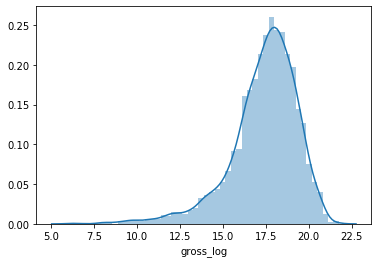

In [72]:
# Worldwide gross, in log-dollars
sns.distplot(box_office['gross_log'])

In [73]:
# Isolate release year/month features
box_office['release_year'] = box_office['Release_dt'].dt.year
box_office['release_month'] = box_office['Release_dt'].dt.month

In [74]:
# Train/Validate/Test split by year
train = box_office[box_office['Release_dt'].dt.year < 2009]
val = box_office[(box_office['Release_dt'].dt.year < 2014) & (box_office['Release_dt'].dt.year >= 2009)]
test = box_office[box_office['Release_dt'].dt.year >= 2014]

In [75]:
target = 'gross_log'

In [76]:
train.shape

(2354, 32)

In [77]:
val.shape

(792, 32)

In [78]:
test.shape

(766, 32)

In [79]:
2354 + 792 + 766
# My train/validate/test split appears to have worked!

3912

In [80]:
# Mean worldwide gross in log-dollars
train[target].mean()

17.25923402478346

In [81]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Baseline? What's my mean?
y_mean = train[target].mean()

# What's my mean squared error if I always guess the mean?
y_pred = pd.Series(y_mean for _ in range(len(val[target])))
mse_baseline_log = mean_squared_error(val[target], y_pred)
mae_baseline_log = mean_absolute_error(val[target], y_pred)

In [82]:
# Mean squared error for mean baseline = 4.55 log-dollars
mse_baseline_log

4.555124292593721

In [83]:
mae_baseline_log

1.6324285447358133

In [84]:
mse_baseline_dollars = mean_squared_error(np.expm1(val[target]), np.expm1(y_pred))
mae_baseline_dollars = mean_absolute_error(np.expm1(val[target]), np.expm1(y_pred))

In [85]:
# Does this give me the MSE in dollars? Seems impossibly accurate...
mse_baseline_dollars

6.122453577580271e+16

In [86]:
mae_baseline_dollars

121351328.60461295

In [87]:
X_train = train.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'averageRating'])
y_train = train[target]
X_val = val.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'averageRating'])
y_val = val[target]
X_test = test.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'averageRating'])
y_test = test[target]

In [88]:
X_train.head()

runtimeNumber  Action  Adventure  Animation  Biography  Comedy  Crime  \
12397           88.0       0          0          0          0       1      0   
12427          104.0       0          1          0          0       0      0   
12428          133.0       0          1          0          0       1      1   
12440           98.0       0          0          0          0       1      0   
12444          124.0       0          0          0          1       1      0   

       Documentary  Drama  Family  ...  Romance  Sci-Fi  Sport  Thriller  War  \
12397            0      0       0  ...        0       0      0         0    0   
12427            0      1       0  ...        1       0      0         0    0   
12428            0      0       0  ...        0       0      0         0    0   
12440            0      0       0  ...        0       0      1         0    0   
12444            0      0       0  ...        0       0      0         0    0   

       Western  Production_Budget  hyped  release_year  release_month  
12397        0            3500000   True          1980              7  
12427        0            4500000  False          1980              6  
12428        0           27000000   True          1980              6  
12440        0            6000000   True          1980              7  
12444        0           20000000  False          1980              6  

[5 rows x 27 columns]

In [89]:
y_train.head()

12397    18.239801
12427    17.685123
12428    17.862587
12440    17.500541
12444    14.508658
Name: gross_log, dtype: float64

# Plotly Express

In [90]:
def genre_analysis(genres):
    for genre in genres:
        box_office_genre = box_office[box_office[genre] == True]
        fig = px.scatter(box_office_genre, x='Production_Budget', y='gross_log', color='runtimeNumber', marginal_x='histogram')
        fig.update_layout(title=genre)
        fig.show()

In [91]:
fig = px.scatter(box_office, x='Production_Budget', y='Worldwide_Gross', color='runtimeNumber', marginal_x='histogram')
fig.show()

In [92]:
fig = px.scatter(box_office, x='Production_Budget', y='gross_log', color='runtimeNumber', marginal_x='histogram')
fig.show()

In [93]:
genres = ['Adventure', 'Action', 'Comedy', 'Drama', 'Crime', 'hyped']
for genre in genres:
    box_office_genre = box_office[box_office[genre] == True]
    fig = px.scatter(box_office_genre, x='Production_Budget', y='gross_log', color='runtimeNumber', marginal_x='histogram')
    fig.update_layout(title=genre)
    fig.show()

In [94]:
box_office[box_office['gross_log'] < 10]

primaryTitle  averageRating  runtimeNumber  \
20789  The Last Time I Committed Suicide            5.6           92.0   
21274                           Safe Men            5.9           88.0   
22149                              Molly            5.8          102.0   
22167            Dreaming of Joseph Lees            6.5           92.0   
23347                       The Specials            5.8           82.0   
27252                              Sonny            5.6          110.0   
29325                   The Californians            4.8           87.0   
29694       My Big Fat Independent Movie            3.2           80.0   
30166                     The Dark Hours            6.0           80.0   
30794                         Opal Dream            6.6           85.0   
32474                             August            5.3           88.0   
33065                In Her Line of Fire            3.5           88.0   
33699                      The Dead Girl            6.6           85.0   
34221                 And Then Came Love            4.6           90.0   
35744                      The Open Road            5.5           90.0   
36691                 The Missing Person            6.1           95.0   
36850                             Circle            3.3           88.0   
37735                              Grace            5.1           84.0   
37995                          Locker 13            4.7           90.0   
40324                            Area 51            4.2           91.0   
42514       The Ghastly Love of Johnny X            5.7          106.0   
42623           The Giant Mechanical Man            6.7           95.0   
42644                 Trade of Innocents            5.4           88.0   
43872                      Drunk Wedding            4.6           81.0   
45951                      Falcon Rising            5.8          103.0   
47820                    The Sleepwalker            4.9           91.0   
48279                       Higher Power            5.4           93.0   
49911              10 Days in a Madhouse            6.7          111.0   
50121                           The Word            4.8           97.0   
51821                               Test            7.2           96.0   

       Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
20789       0          0          0          1       0      0            0   
21274       0          0          0          0       1      1            0   
22149       0          0          0          0       1      0            0   
22167       0          0          0          0       0      0            0   
23347       1          0          0          0       1      0            0   
27252       0          0          0          0       0      1            0   
29325       0          0          0          0       0      0            0   
29694       0          0          0          0       1      0            0   
30166       0          0          0          0       0      0            0   
30794       0          0          0          0       0      0            0   
32474       0          0          0          0       0      0            0   
33065       1          0          0          0       0      0            0   
33699       0          0          0          0       0      1            0   
34221       0          0          0          0       1      0            0   
35744       0          0          0          0       1      0            0   
36691       0          0          0          0       0      0            0   
36850       0          0          0          0       0      0            0   
37735       0          0          0          0       0      0            0   
37995       0          0          0          0       0      0            0   
40324       0          0          0          0       0      0            0   
42514       0          0          0          0       1      0            0   
42623       0    

In [95]:
fig = px.scatter(box_office, x='Production_Budget', y='gross_log', color='runtimeNumber', marginal_x='histogram')
fig.show()

# Fitting xgboost Model

In [96]:
from xgboost import XGBRegressor

In [97]:
gb = XGBRegressor(n_estimators=100, n_jobs=-1)
gb.fit(X_train, y_train)

c:\users\ben\anaconda3\envs\unit2\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

c:\users\ben\anaconda3\envs\unit2\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20:02:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
y_pred = gb.predict(X_val)

In [99]:
mse = mean_squared_error(y_val, y_pred)
mse

1.853232476223826

In [100]:
mse = mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
mse

2.237297389891496e+16

In [101]:
# MSE baseline
mse_baseline_log
# Beat it!

4.555124292593721

In [102]:
# MSE for XGBRegressor = 1.79 log-dollars

In [103]:
# Try mean absolute error
mae = mean_absolute_error(y_val, y_pred)

In [104]:
print('mean absolute error:', mae)

mean absolute error: 0.953480348230887


In [105]:
# Baseline MAE
mae_baseline_log
# Beat it!

1.6324285447358133

In [106]:
# Un-log y_val and y_pred, then get mean absolute error in US dollars

mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))

69714226.57272923

# Get Permutation Importances for XGBoost model

In [107]:
import eli5
from eli5.sklearn import PermutationImportance
# Model already fit with train data
permuter = PermutationImportance(
    gb,
    scoring='neg_mean_squared_error',
    n_iter=5
)
permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=3,
                                             min_child_weight=1, missing=None,
                                             n_estimators=100, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                      

In [108]:
permuter.feature_importances_

array([-1.22158438e-02,  1.19183917e-02, -1.36975102e-03,  1.83650107e-03,
        3.62109396e-02,  1.34719854e-02,  6.26641913e-03,  9.84255656e-04,
        4.85301503e-02, -4.63257829e-04,  5.34872554e-03,  9.60415652e-04,
        4.78300637e-02,  3.25335135e-03,  2.41544257e-03,  2.25891302e-02,
       -8.14741453e-03, -1.90996100e-03, -2.31892452e-03, -2.74395650e-04,
        4.06018698e-03,  4.77039192e-02,  1.44980265e-04,  4.17603043e+00,
        3.09226349e-01,  0.00000000e+00,  7.71348265e-02])

In [109]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist())

In [110]:
from joblib import dump
dump(gb, 'xgb.joblib', compress=True)

['xgb.joblib']

# PDP for XGBoost

In [111]:
plt.rcParams['figure.dpi'] = 150

In [112]:
from pdpbox.pdp import pdp_isolate, pdp_plot

## Budget

In [113]:
feature='Production_Budget'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

In [114]:
plt.rcParams['figure.dpi'] = 150

(<Figure size 2250x1425 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2149262df28>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x21492516470>})

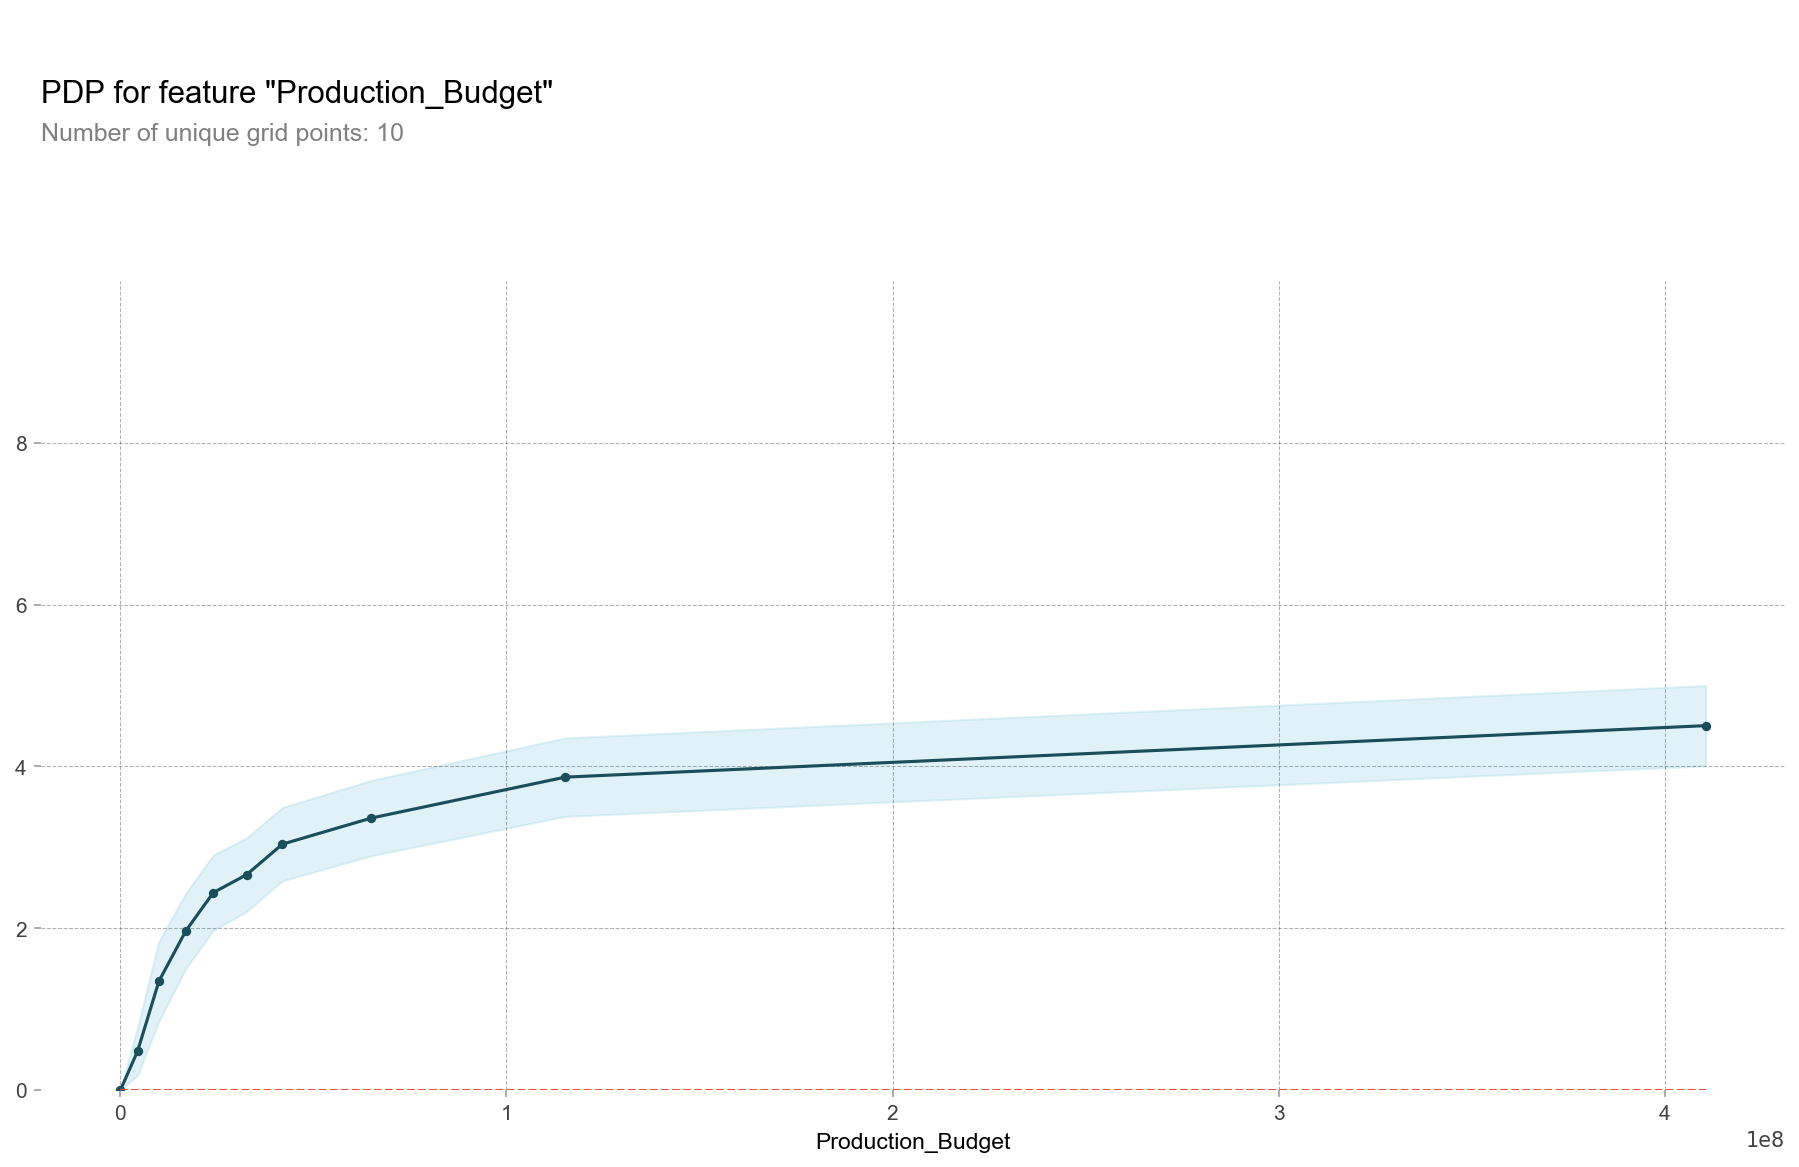

In [115]:
pdp_plot(isolated, feature_name=feature)

(0, 200000000)

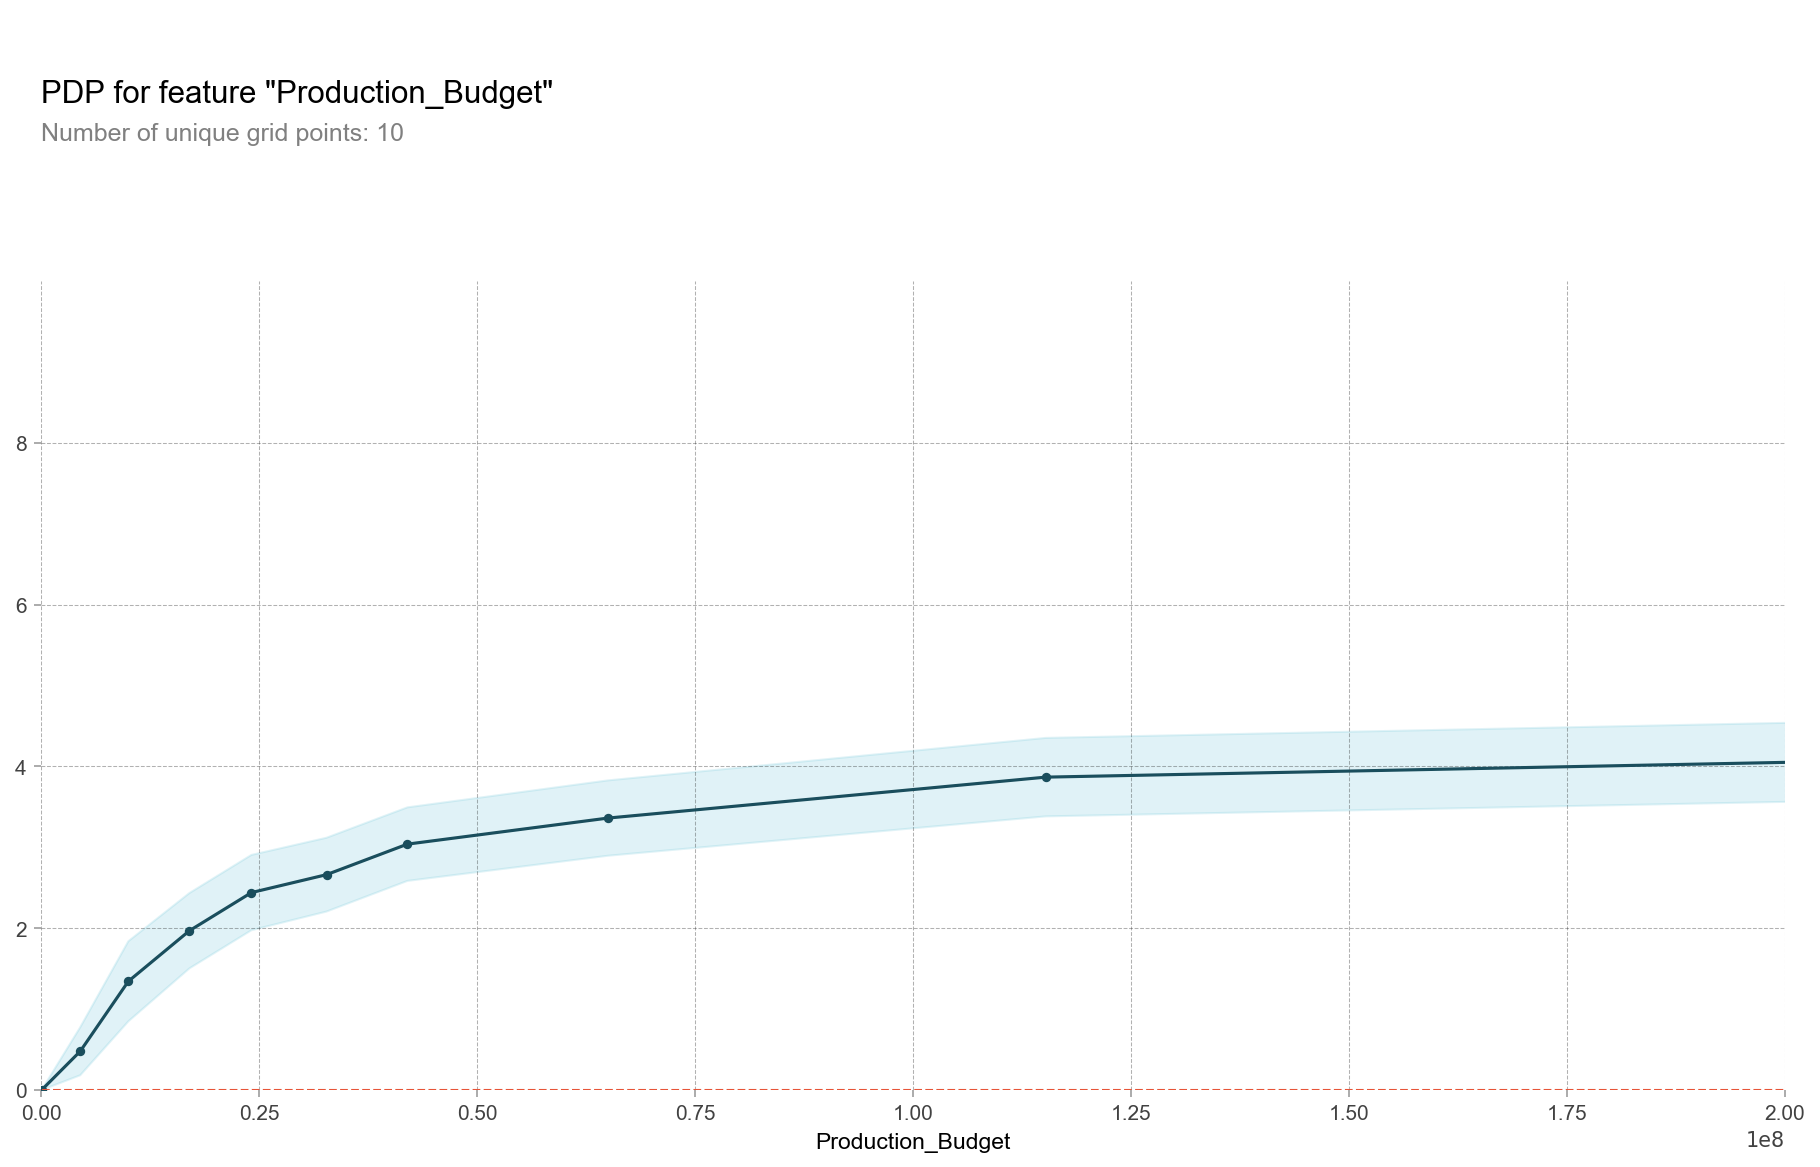

In [116]:
pdp_plot(isolated, feature_name=feature)
plt.xlim(0,200000000)

(0, 100000000)

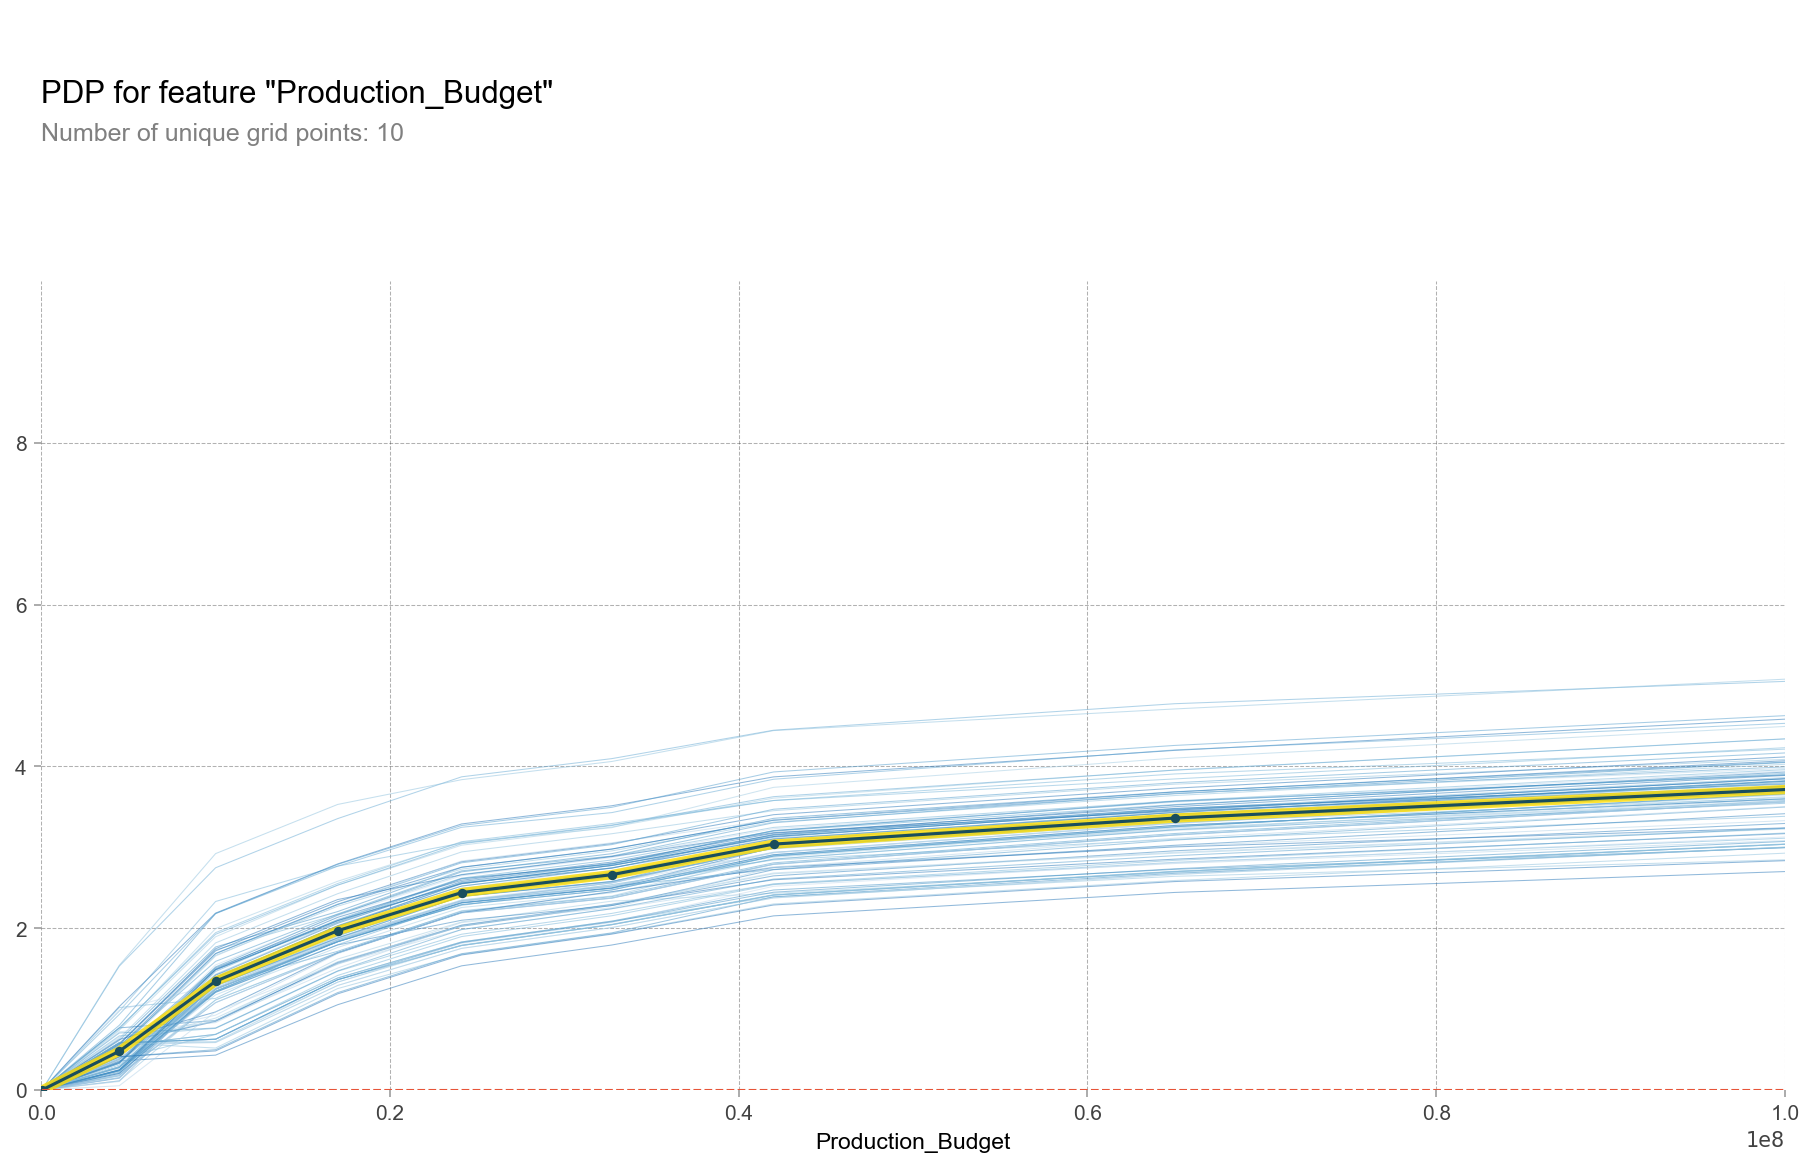

In [117]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,100000000)

In [118]:
isolated = pdp_isolate(model=gb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = feature,
                      num_grid_points = 50)

(0, 100000000)

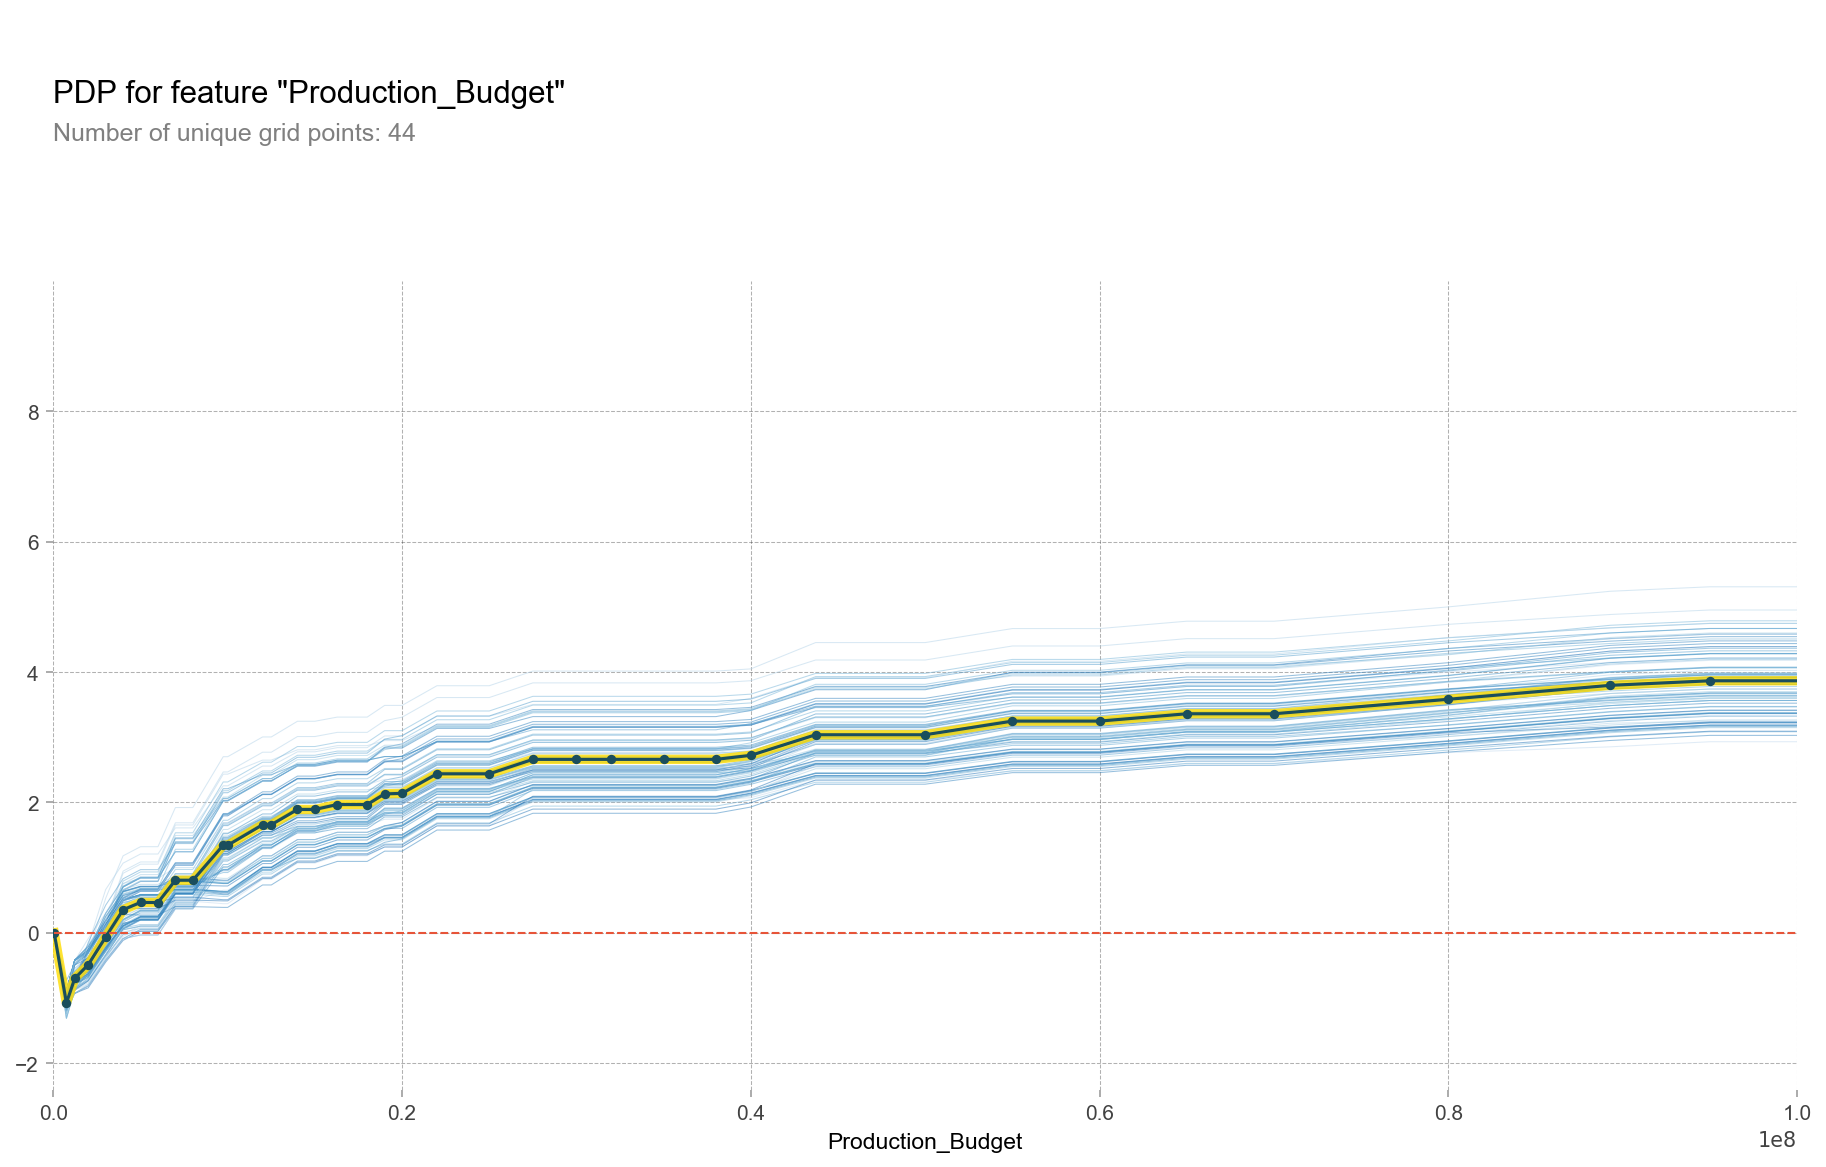

In [119]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,100000000)

In [120]:
grid = isolated.feature_grids
pdp = isolated.pdp

In [121]:
lines = isolated.ice_lines.sample(100).T

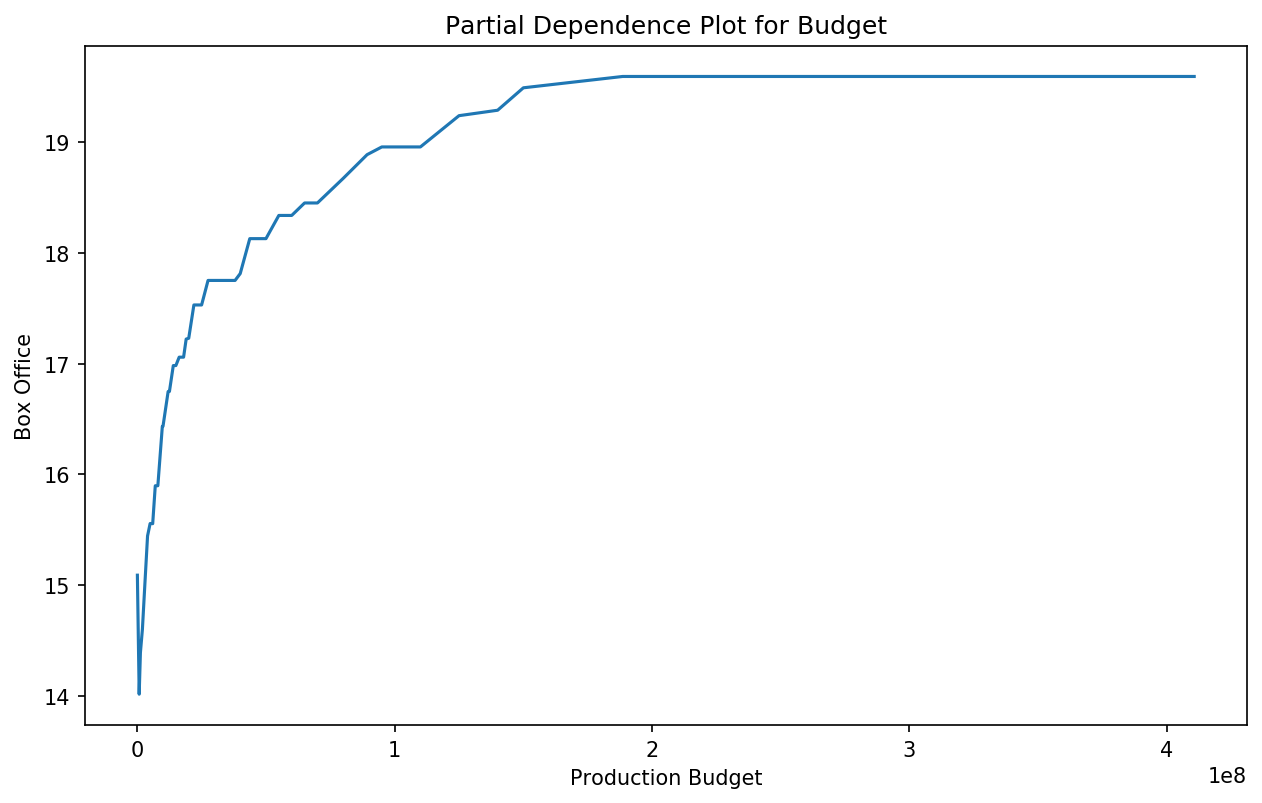

In [122]:
plt.figure(figsize=(10,6))
plt.plot(grid, pdp)
plt.ylabel('Box Office')
plt.xlabel('Production Budget')
plt.title('Partial Dependence Plot for Budget');

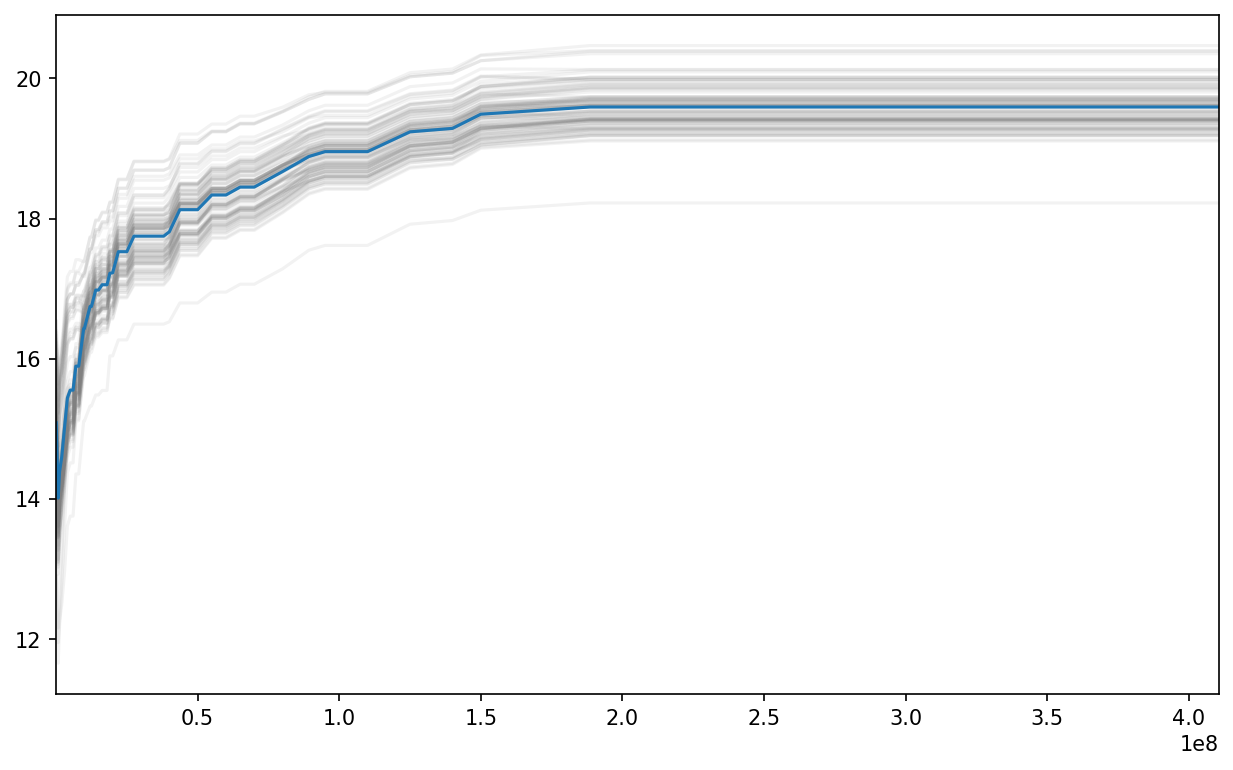

In [123]:
lines.plot(color='grey', alpha=0.1, legend=False, figsize=(10,6))
plt.plot(grid, pdp)

## Average Rating

In [124]:
feature = 'hyped'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

(<Figure size 2250x1425 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x214931804a8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2148ff12588>})

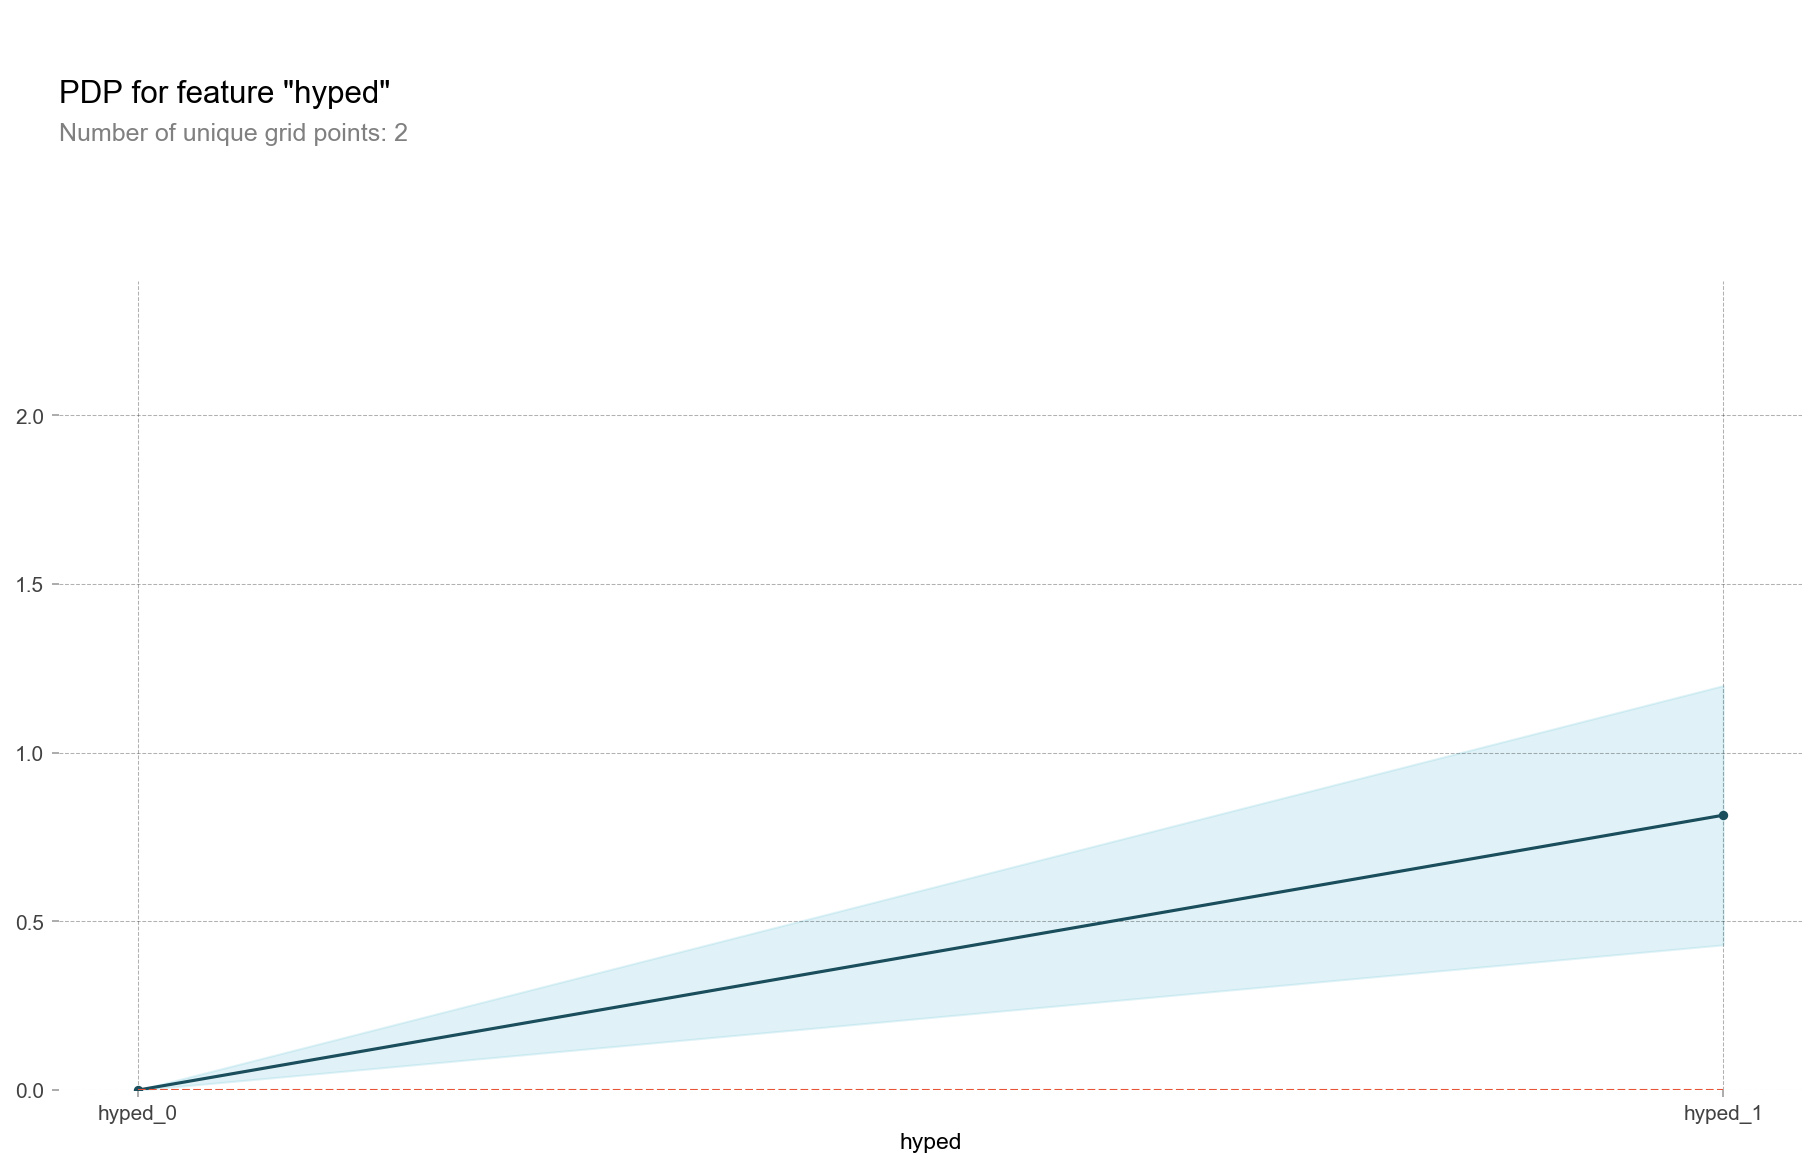

In [125]:
pdp_plot(isolated, feature_name=feature)

(<Figure size 2250x1425 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x21493e64b38>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x21492973978>})

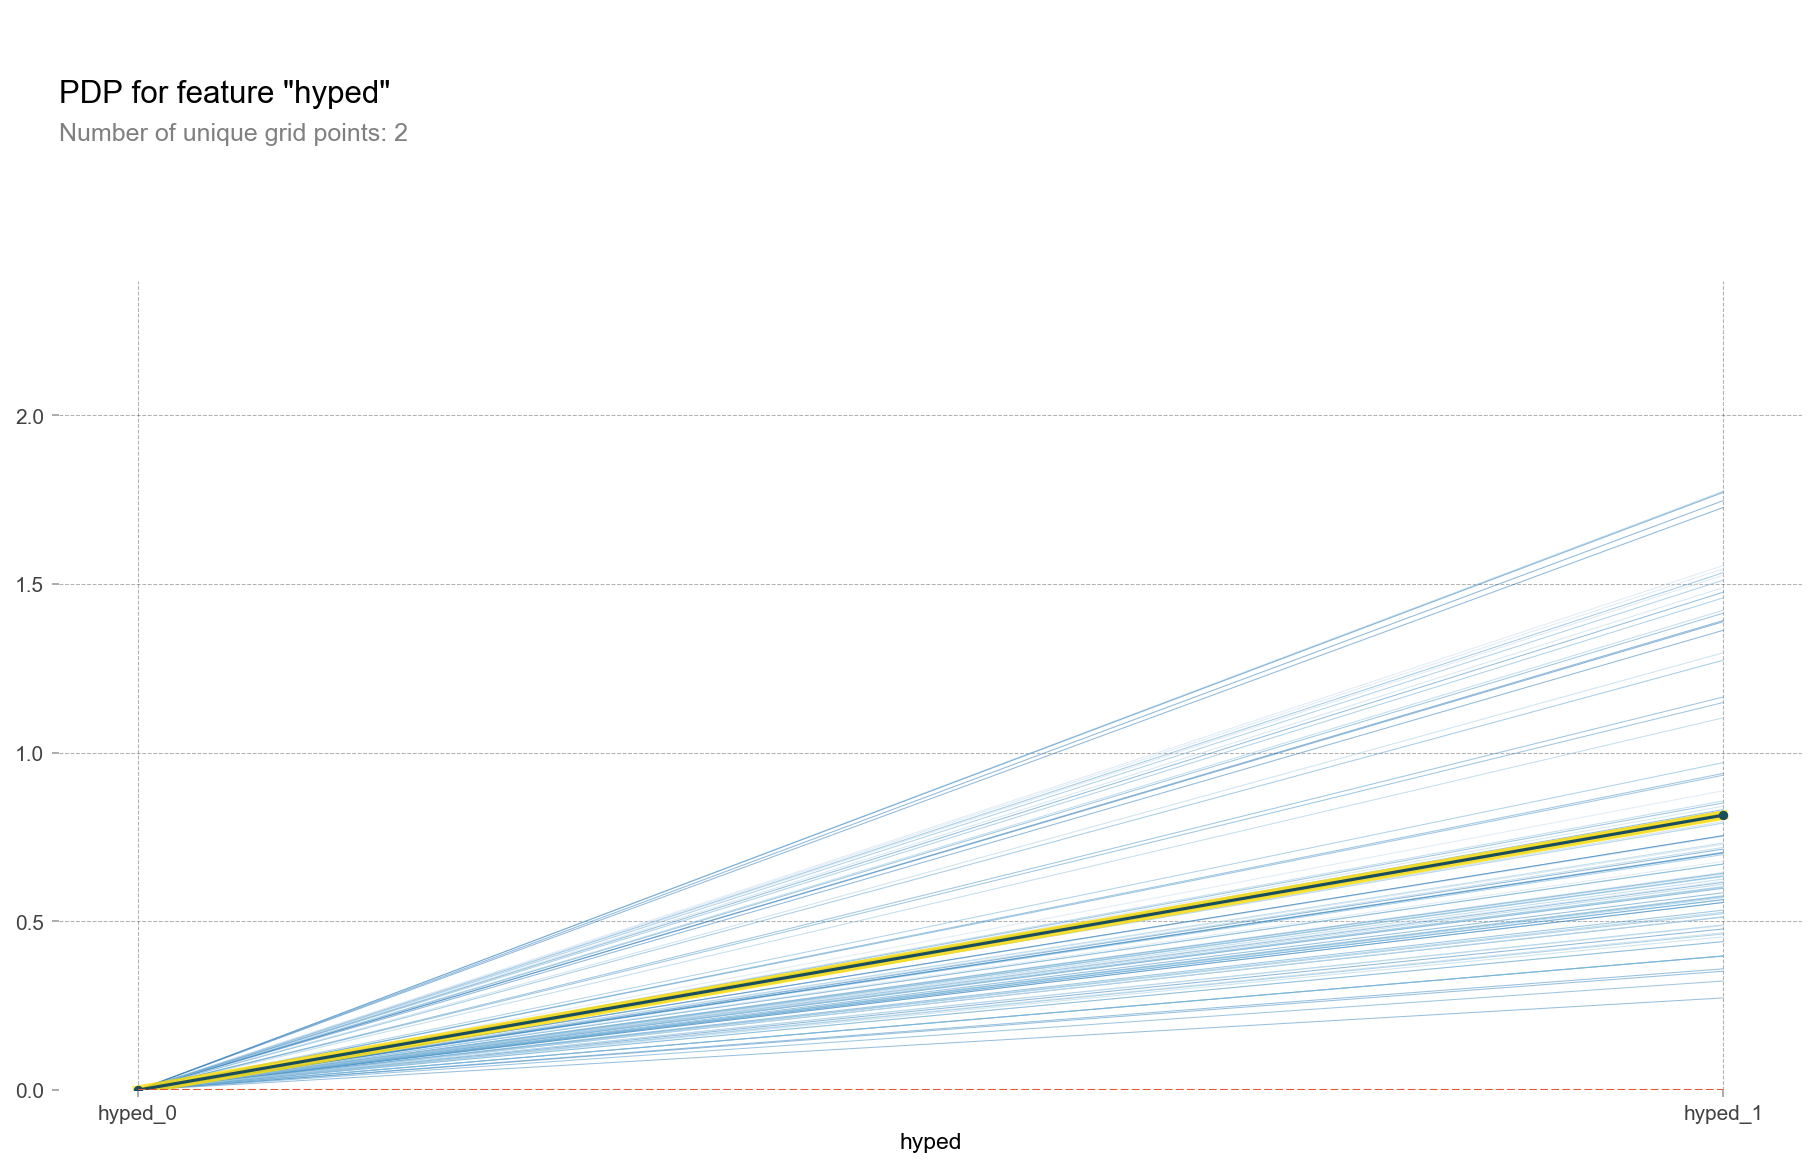

In [126]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

In [127]:
isolated = pdp_isolate(model=gb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = feature,
                      num_grid_points = 50)

(<Figure size 2250x1425 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2148eedbc18>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x21493364f60>})

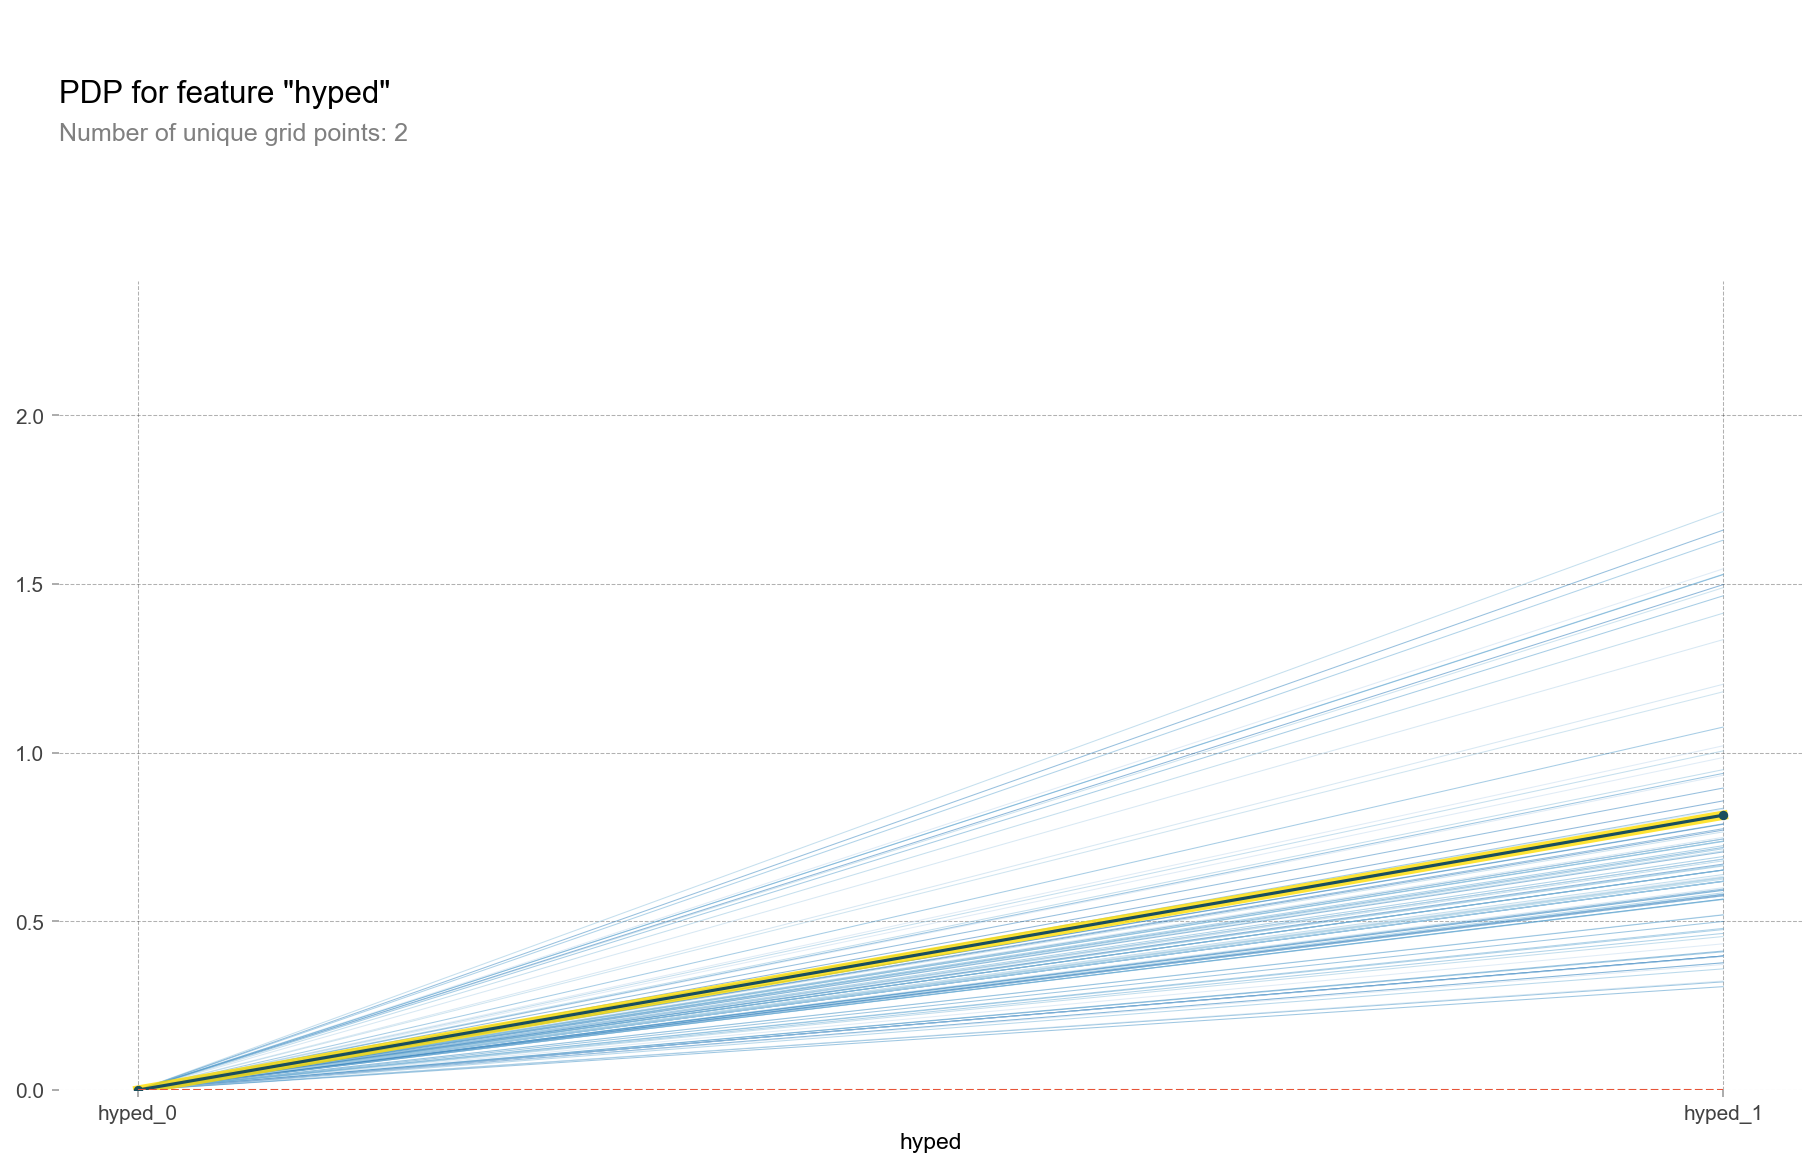

In [128]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

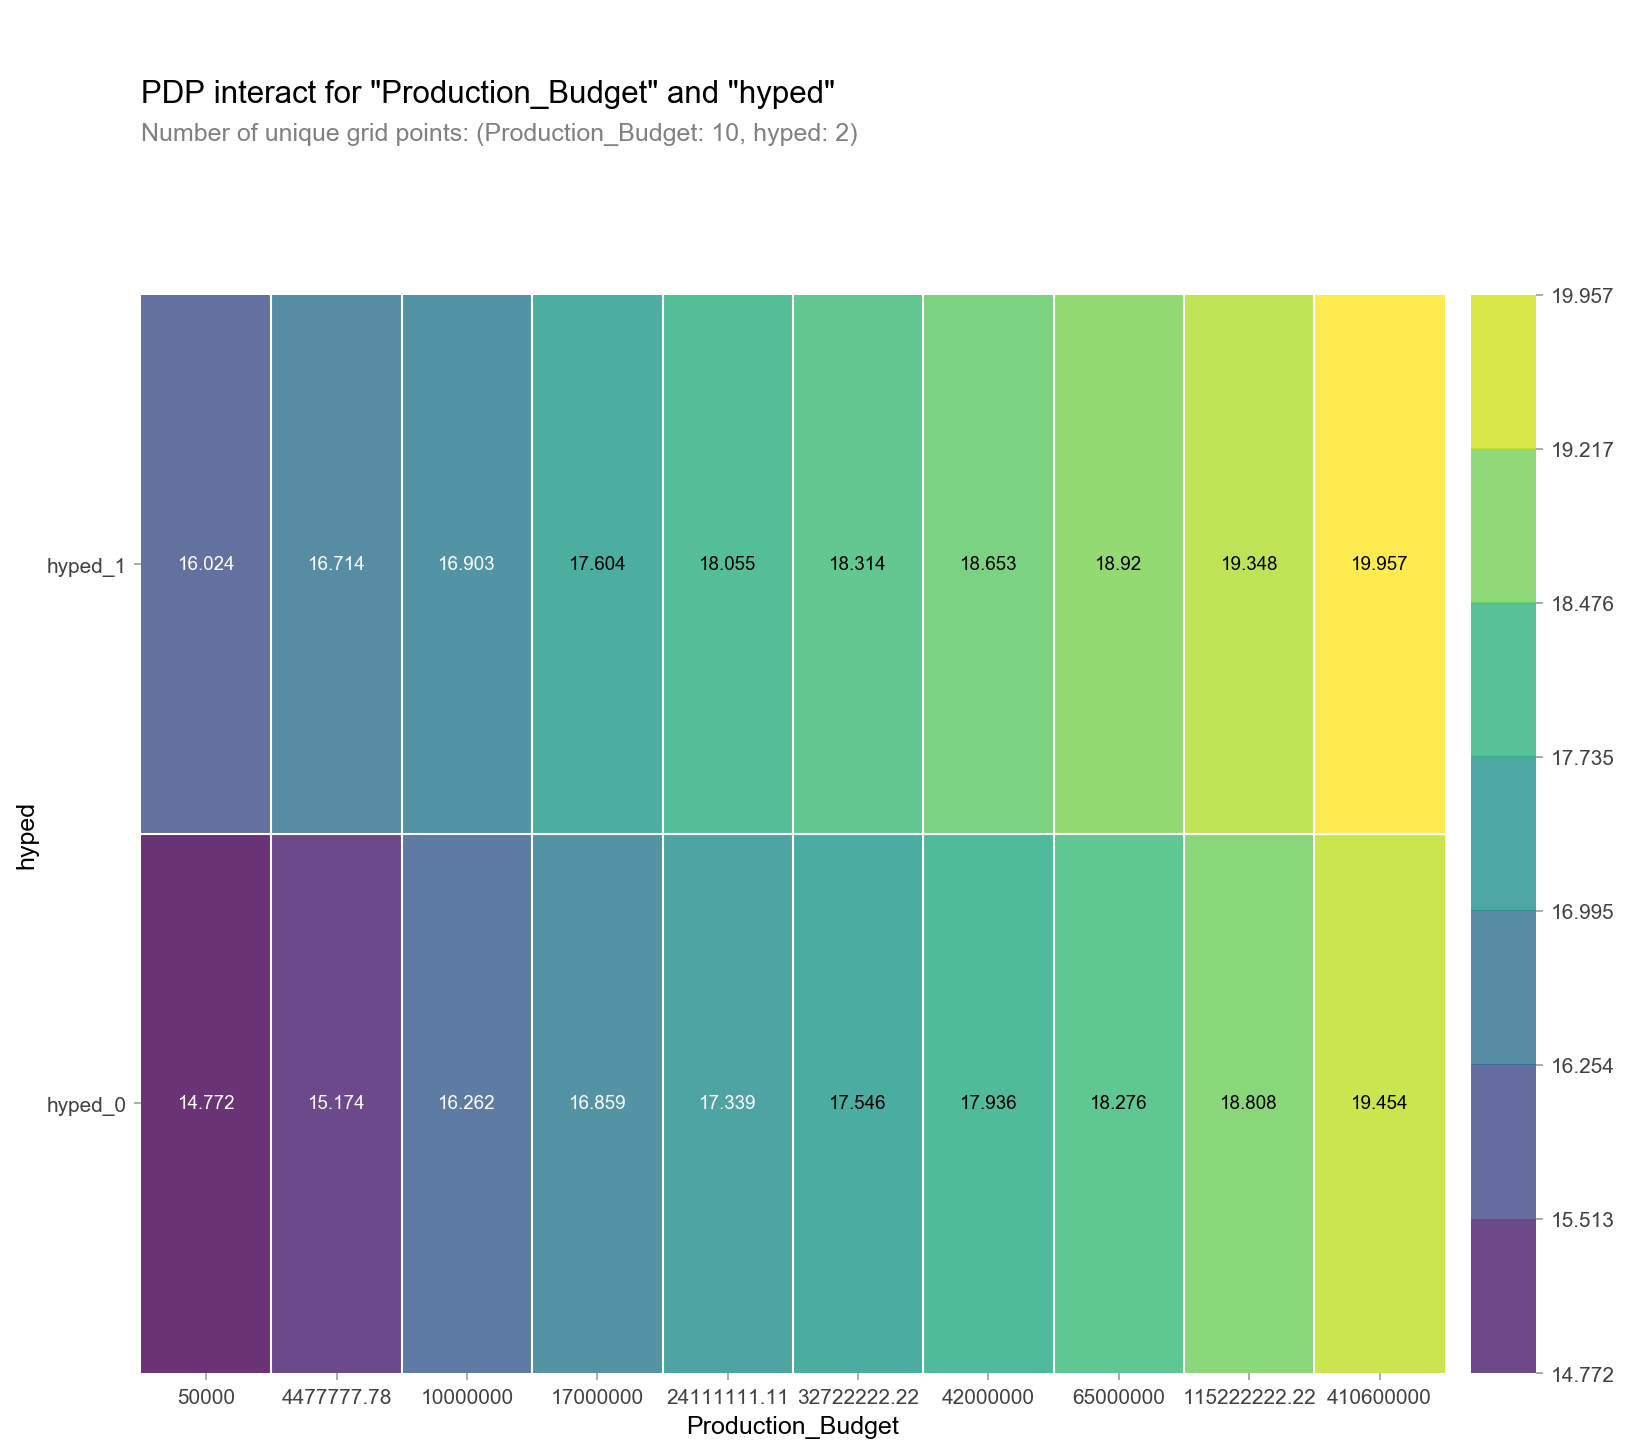

In [129]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Production_Budget', 'hyped']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

plot = pdp_interact_plot(interaction, plot_type='grid', feature_names=features, figsize=(12,12))

# Fit XGB without averageRating

In [130]:
X_train = train.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'averageRating'])
y_train = train[target]
X_val = val.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'averageRating'])
y_val = val[target]
X_test = test.drop(columns=[target, 'Worldwide_Gross', 'Release_dt', 'primaryTitle', 'averageRating'])
y_test = test[target]

In [131]:
gb = XGBRegressor(n_estimators=100, n_jobs=-1)
gb.fit(X_train, y_train)

[20:02:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [132]:
y_pred = gb.predict(X_val)

In [133]:
mse = mean_squared_error(y_val, y_pred)
mse

1.853232476223826

In [134]:
mse_baseline_log

4.555124292593721

# Fitting Linear Regression model?

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
y_pred = lr.predict(X_val)
y_pred

array([18.64552763, 16.54179361, 19.16996166, 18.0906247 , 16.51370156,
       17.04548015, 18.25072619, 16.88427604, 18.65897444, 17.0524124 ,
       18.45880246, 24.60601375, 23.76081791, 21.43244541, 24.80125652,
       17.88335101, 19.46094856, 16.89385071, 18.23604853, 20.02494763,
       23.09150803, 20.39837526, 21.31921655, 18.03988397, 19.66201285,
       17.56381247, 19.71809219, 17.09381014, 17.73338106, 17.53153521,
       19.89291317, 16.92913313, 19.04750225, 19.7342631 , 19.93494933,
       16.75556511, 17.11643044, 15.95702932, 18.34686821, 17.74979427,
       19.56370819, 16.12537073, 17.2942808 , 16.62230324, 18.58575952,
       18.54700638, 16.77471279, 17.18198508, 16.51113863, 18.22155355,
       21.0470739 , 17.18170064, 17.00893754, 17.2346875 , 16.43506753,
       24.12671755, 17.28210327, 17.92737073, 16.63463036, 17.31526535,
       17.53872889, 16.65019   , 23.26775849, 17.5024556 , 16.38180284,
       16.55891261, 20.19149637, 17.66628057, 20.22657257, 17.43

In [138]:
mse = mean_squared_error(y_val, y_pred)
mse

2.7912798242997323

In [139]:
mae = mean_absolute_error(y_val, y_pred)
mae

1.2610980651660715

In [140]:
mae_dollars = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
mae_dollars

2609236438.147297

Seems to give me very similar output. Interesting...
I must wonder if there's something wrong with my MSE display. Getting exactly the same MSE for XGBoost and linear regression seems odd. But the y_pred arrays are very similar though slightly different...

EDIT: Of course I was forgetting to reassign to the variable! :D Even so, I beat my baseline MAE. 

In [141]:
mse_baseline_log

4.555124292593721

In [142]:
mae_baseline_log

1.6324285447358133

# SHAP

In [143]:
row = X_test.iloc[[0]]
row

runtimeNumber  Action  Adventure  Animation  Biography  Comedy  Crime  \
28908          114.0       1          0          0          0       0      1   

       Documentary  Drama  Family  ...  Romance  Sci-Fi  Sport  Thriller  War  \
28908            0      1       0  ...        0       0      0         0    0   

       Western  Production_Budget  hyped  release_year  release_month  
28908        0           28000000  False          2014              9  

[1 rows x 27 columns]

In [144]:
y_test.iloc[[0]]

28908    17.944395
Name: gross_log, dtype: float64

Test just to make sure my logging and reverse logging works as intended. 62,108,587 is indeed the box office take for the film indexed 28908, A Walk Among The Tombstones

In [145]:
np.expm1(y_test.iloc[[0]])

28908    62108587.0
Name: gross_log, dtype: float64

In [146]:
gb.predict(row)

array([17.104347], dtype=float32)

In [147]:
import shap

explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [148]:
shap_values

array([[ 8.1017859e-02, -6.3883322e-03, -9.2231750e-04, -3.8170656e-03,
         7.4466993e-03, -5.1280320e-02, -3.7873529e-02, -4.3915524e-04,
        -1.6680719e-01, -5.4824548e-03, -1.4816131e-03,  3.7795554e-03,
        -3.1583477e-02, -3.8856543e-03,  1.8921532e-04, -6.7556291e-03,
        -2.8146879e-04, -7.5805481e-03,  7.2165020e-03,  8.5391679e-05,
        -1.4079667e-02,  1.4268020e-02, -3.0858431e-05,  4.6418205e-01,
        -2.1883553e-01,  2.5856458e-02, -2.0108555e-01]], dtype=float32)

# Test

In [149]:
y_pred = gb.predict(X_test)

In [150]:
mse = mean_squared_error(y_test, y_pred)
mse

1.931504510803245

In [151]:
mse_baseline_log
# Beat it!

4.555124292593721

In [152]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.0132592368624858

In [153]:
mae_baseline_log
# Beat it!

1.6324285447358133

In [155]:
mae_dollars = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
mae_dollars

98401714.06090894

In [157]:
mae_baseline_dollars
# Beat it by around 23 million dollars

121351328.60461295